Importing all packages and modules in one cell

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


from library.sb_utils import save_file

Objectives: 

-Perform Data Wrangling on the csv files obtained from : https://emp.lbl.gov/tracking-the-sun

-Evaluate missing values in calumns and which columns to use for our analysis. 

In [56]:
!ls

Capstone2_Data_Wrangling.ipynb      library
Capstone2_Data_Wrangling_rev1.ipynb


The entire data set is split into 2 separate csv files. Consequently two data frames are created - pv_df1 and pv_df2 corresponding to each csv file. In doing so, the file with more data, has lost some data ( 1 row in this case) since the csv. application can only handle a maximum number 1,000,000 rows and our data set has 1,000,001. 

In [57]:
pv_df1 = pd.read_csv('../data/raw/TTS_LBNL_public_file_19-Oct-2020_p1.csv')
pv_df1.head()

/Users/srijagannathan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1,3,14,30,31,33,34,38,55,56,58,59) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,data_provider_1,data_provider_2,system_ID_1,system_ID_2,installation_date,system_size_DC,total_installed_price,rebate_or_grant,customer_segment,expansion_system,...,built_in_meter_inverter_1,built_in_meter_inverter_2,built_in_meter_inverter_3,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,battery_rated_capacity_kW,battery_rated_capacity_kWh
0,Arkansas State Energy Office,-9999,-9999,-9999,29-Apr-2010 00:00:00,2.016,14558.0,0.0,RES,0,...,0,-9999,-9999,0.19,-9999.0,-9999.0,0,1.178947,-9999.0,-9999.0
1,Arkansas State Energy Office,-9999,-9999,-9999,26-Apr-2010 00:00:00,3.360,26096.0,0.0,RES,0,...,0,-9999,-9999,0.19,-9999.0,-9999.0,0,1.178947,-9999.0,-9999.0
2,Arkansas State Energy Office,-9999,-9999,-9999,20-Apr-2010 00:00:00,13.440,91139.0,0.0,RES,0,...,0,-9999,-9999,0.19,-9999.0,-9999.0,0,1.178947,-9999.0,-9999.0
3,Arkansas State Energy Office,-9999,-9999,-9999,21-Apr-2010 00:00:00,5.520,40043.0,0.0,RES,0,...,0,-9999,-9999,0.19,-9999.0,-9999.0,0,1.210526,-9999.0,-9999.0
4,Arkansas State Energy Office,-9999,-9999,-9999,22-Apr-2010 00:00:00,2.530,21497.0,0.0,RES,0,...,0,-9999,-9999,0.19,-9999.0,-9999.0,0,1.210526,-9999.0,-9999.0


Given that the above specified columns have a mixed dtype in there, it will be useful to import those columns as all strings. 

In [58]:
pv_df1.shape

(1000000, 78)

A preliminary review of the csv file shows the list of columns and their descriptions. 

In [59]:
pv_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 78 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   data_provider_1                  1000000 non-null  object 
 1   data_provider_2                  1000000 non-null  object 
 2   system_ID_1                      1000000 non-null  object 
 3   system_ID_2                      1000000 non-null  object 
 4   installation_date                1000000 non-null  object 
 5   system_size_DC                   1000000 non-null  float64
 6   total_installed_price            1000000 non-null  float64
 7   rebate_or_grant                  1000000 non-null  float64
 8   customer_segment                 1000000 non-null  object 
 9   expansion_system                 1000000 non-null  int64  
 10  multiple_phase_system            1000000 non-null  int64  
 11  new_construction                 1000000 non-null  

In [60]:
pv_df2 = pd.read_csv('../data/raw/TTS_LBNL_public_file_19-Oct-2020_p2.csv')
pv_df2.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 5: invalid start byte

On reading the second data file we see that it has some encoded data. We try to determine the encoding using the chardet module as shown below. 

In [61]:
import chardet
file = '../data/raw/TTS_LBNL_public_file_19-Oct-2020_p2.csv'

In [62]:
with open(file,'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

The encoding is ascii as shown from the line of code above. Using a latin1 encoding we are able to read the csv file without any errors.

In [63]:
pv_df2 = pd.read_csv('../data/raw/TTS_LBNL_public_file_19-Oct-2020_p2.csv', encoding = "latin1")
pv_df2.head()

/Users/srijagannathan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1,2,3,14,15,17,19,27,28,30,31,33,34,37,38,39,52,53,55,56,58,59) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,data_provider_1,data_provider_2,system_ID_1,system_ID_2,installation_date,system_size_DC,total_installed_price,rebate_or_grant,customer_segment,expansion_system,...,built_in_meter_inverter_1,built_in_meter_inverter_2,built_in_meter_inverter_3,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,battery_rated_capacity_kW,battery_rated_capacity_kWh
0,Arizona Public Service,-9999,R1297,-9999,03-Feb-2009 00:00:00,8.64,57162.77,25920.0,RES,0,...,-9999,-9999,-9999,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999.0
1,Arizona Public Service,-9999,R1268,-9999,26-Jan-2009 00:00:00,3.40,26507.20,10500.0,RES,0,...,-9999,-9999,-9999,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999.0
2,Arizona Public Service,-9999,R1023,-9999,15-Oct-2008 00:00:00,4.80,36292.00,12960.0,RES,0,...,-9999,-9999,-9999,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999.0
3,Arizona Public Service,-9999,R1180,-9999,02-Feb-2009 00:00:00,1.52,13230.00,4560.0,RES,0,...,-9999,-9999,-9999,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999.0
4,Arizona Public Service,-9999,R1451,-9999,30-Mar-2009 00:00:00,5.10,40370.32,15300.0,RES,0,...,-9999,-9999,-9999,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999.0


Printing details about the second data frame below. The .info gives an idea of how many columns the data frame has and what types of data the columns hold. Additionally the non zero count gives an insight into how many non null values or valid values are present. 

In [64]:
pv_df2.shape

(844487, 78)

In [65]:
pv_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844487 entries, 0 to 844486
Data columns (total 78 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   data_provider_1                  844487 non-null  object 
 1   data_provider_2                  844487 non-null  object 
 2   system_ID_1                      844487 non-null  object 
 3   system_ID_2                      844487 non-null  object 
 4   installation_date                844487 non-null  object 
 5   system_size_DC                   844487 non-null  float64
 6   total_installed_price            844487 non-null  float64
 7   rebate_or_grant                  844487 non-null  float64
 8   customer_segment                 844487 non-null  object 
 9   expansion_system                 844487 non-null  int64  
 10  multiple_phase_system            844487 non-null  int64  
 11  new_construction                 844487 non-null  int64  
 12  tr

In [66]:
# Concatenating the two data frames. Apprending pv_df2 below pv_df1
pv_df = pd.concat([pv_df1, pv_df2], ignore_index = True)
pv_df.shape

(1844487, 78)

We can see that the two data frames are combined into 1 with 1.8 milion rows!

### Exploring the data: 

The next section will focus on the different columns the data frame has and the kind of data it holds. 

Both data frames have a warning that certain numner of columns have mixed data types. So, lets have a look at that!
Columns (1,2,3,14,15,17,19,27,28,30,31,33,34,37,38,39,52,53,55,56,58,59)

In order to analyze these columns further lets create a separate data frame only with these specific columns.

In [67]:
column_list = [1,2,3,14,15,17,19,27,28,30,31,33,34,37,38,39,52,53,55,56,58,59]
mixed_df = pv_df.iloc[:,column_list]
mixed_df.head()

,data_provider_2,system_ID_1,system_ID_2,zip_code,city,utility_service_territory,installer_name,module_manufacturer_1,module_model_1,module_manufacturer_2,...,module_model_3,technology_module_1,technology_module_2,technology_module_3,inverter_manufacturer_1,inverter_model_1,inverter_manufacturer_2,inverter_model_2,inverter_manufacturer_3,inverter_model_3
0,-9999,-9999,-9999,71953,Mena,SWEPCO,Liberty Solar Solutions,Sharp,ND-224UC1,-9999,...,-9999,Multi-c-Si,-9999,-9999,ENPHASE ENERGY INC.,-9999,-9999,-9999,-9999,-9999
1,-9999,-9999,-9999,72641,Jasper,Carroll Electric,Liberty Solar Solutions,Sharp,ND-224UC1,-9999,...,-9999,Multi-c-Si,-9999,-9999,ENPHASE ENERGY INC.,-9999,-9999,-9999,-9999,-9999
2,-9999,-9999,-9999,71801,Hope,Hope Water & Light,Liberty Solar Solutions,Sharp,ND-224UC1,-9999,...,-9999,Multi-c-Si,-9999,-9999,ENPHASE ENERGY INC.,-9999,-9999,-9999,-9999,-9999
3,-9999,-9999,-9999,71909,Hot Springs Village,First Electric,Liberty Solar Solutions,Sharp,NU-U230F3,-9999,...,-9999,Mono,-9999,-9999,ENPHASE ENERGY INC.,-9999,-9999,-9999,-9999,-9999
4,-9999,-9999,-9999,71909,Hot Springs Village,Entergy,Liberty Solar Solutions,Sharp,NU-U230F3,-9999,...,-9999,Mono,-9999,-9999,ENPHASE ENERGY INC.,-9999,-9999,-9999,-9999,-9999


In [68]:
mixed_df.shape

(1844487, 22)

In [69]:
mixed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1844487 entries, 0 to 1844486
Data columns (total 22 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   data_provider_2            object
 1   system_ID_1                object
 2   system_ID_2                object
 3   zip_code                   object
 4   city                       object
 5   utility_service_territory  object
 6   installer_name             object
 7   module_manufacturer_1      object
 8   module_model_1             object
 9   module_manufacturer_2      object
 10  module_model_2             object
 11  module_manufacturer_3      object
 12  module_model_3             object
 13  technology_module_1        object
 14  technology_module_2        object
 15  technology_module_3        object
 16  inverter_manufacturer_1    object
 17  inverter_model_1           object
 18  inverter_manufacturer_2    object
 19  inverter_model_2           object
 20  inverter_manufacturer_3 

Looking at the data frame that supposedly has mixed columns we see that all the columns are of datatype object (string). However the missing values here are identified as -9999. This creates some confusion. Additionally it can be seen that the columns of interest are all descriptive columns such as model number, model manufacturer, service territory etc. 

Whether we need to update these columns with valid values or drop them altogether will depend on the problem we are going to solve. For instance, if our goal is to create a pricing model for residential installations, we can focus on the state and or territory but we can do without the zip code. Likewise if a great number of values for module manufacturer and system_ID are missing, it may not be useful to assume values for the missing pieces of data. It might make more sense to get rid of these columns based on the percentage of missing values. 

For now, however it is good to know the specific columns with the mixed data types. One step that can be taken here is that the values in these columns can all be converted to string dtype. 

In [70]:
pv_df.iloc[:,1].astype(str)

0          -9999
1          -9999
2          -9999
3          -9999
4          -9999
           ...  
1844482    -9999
1844483    -9999
1844484    -9999
1844485    -9999
1844486    -9999
Name: data_provider_2, Length: 1844487, dtype: object

In [71]:
# iterating through the columns with mixed data types and converting them all to type 'str'
for column in column_list:
    pv_df.iloc[:, column] = pv_df.iloc[:, column].astype(str)

In [72]:
pv_df.head()

,data_provider_1,data_provider_2,system_ID_1,system_ID_2,installation_date,system_size_DC,total_installed_price,rebate_or_grant,customer_segment,expansion_system,...,built_in_meter_inverter_1,built_in_meter_inverter_2,built_in_meter_inverter_3,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,battery_rated_capacity_kW,battery_rated_capacity_kWh
0,Arkansas State Energy Office,-9999,-9999,-9999,29-Apr-2010 00:00:00,2.016,14558.0,0.0,RES,0,...,0,-9999,-9999,0.19,-9999.0,-9999.0,0,1.178947,-9999.0,-9999.0
1,Arkansas State Energy Office,-9999,-9999,-9999,26-Apr-2010 00:00:00,3.360,26096.0,0.0,RES,0,...,0,-9999,-9999,0.19,-9999.0,-9999.0,0,1.178947,-9999.0,-9999.0
2,Arkansas State Energy Office,-9999,-9999,-9999,20-Apr-2010 00:00:00,13.440,91139.0,0.0,RES,0,...,0,-9999,-9999,0.19,-9999.0,-9999.0,0,1.178947,-9999.0,-9999.0
3,Arkansas State Energy Office,-9999,-9999,-9999,21-Apr-2010 00:00:00,5.520,40043.0,0.0,RES,0,...,0,-9999,-9999,0.19,-9999.0,-9999.0,0,1.210526,-9999.0,-9999.0
4,Arkansas State Energy Office,-9999,-9999,-9999,22-Apr-2010 00:00:00,2.530,21497.0,0.0,RES,0,...,0,-9999,-9999,0.19,-9999.0,-9999.0,0,1.210526,-9999.0,-9999.0


### Calculating % of missing values or alternatively columns with values -9999 in the main pv_df dataframe. 

Given that all missing/ invalid values are set as -9999. We will first replace all -9999 with a NaN since pandas has more useful tools to analyze null values.

In [73]:
pv1 = pv_df # creating a duplicate dataframe that we will use for manipulation.

In [74]:
# replacing all those values in all columns that have a value = '-9999' ( note that it is a string '-9999')
pv1[pv1 == '-9999']= np.nan
pv1.head()

,data_provider_1,data_provider_2,system_ID_1,system_ID_2,installation_date,system_size_DC,total_installed_price,rebate_or_grant,customer_segment,expansion_system,...,built_in_meter_inverter_1,built_in_meter_inverter_2,built_in_meter_inverter_3,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,battery_rated_capacity_kW,battery_rated_capacity_kWh
0,Arkansas State Energy Office,NaN,NaN,NaN,29-Apr-2010 00:00:00,2.016,14558.0,0.0,RES,0,...,0,-9999,-9999,0.19,-9999.0,-9999.0,0,1.178947,-9999.0,-9999.0
1,Arkansas State Energy Office,NaN,NaN,NaN,26-Apr-2010 00:00:00,3.360,26096.0,0.0,RES,0,...,0,-9999,-9999,0.19,-9999.0,-9999.0,0,1.178947,-9999.0,-9999.0
2,Arkansas State Energy Office,NaN,NaN,NaN,20-Apr-2010 00:00:00,13.440,91139.0,0.0,RES,0,...,0,-9999,-9999,0.19,-9999.0,-9999.0,0,1.178947,-9999.0,-9999.0
3,Arkansas State Energy Office,NaN,NaN,NaN,21-Apr-2010 00:00:00,5.520,40043.0,0.0,RES,0,...,0,-9999,-9999,0.19,-9999.0,-9999.0,0,1.210526,-9999.0,-9999.0
4,Arkansas State Energy Office,NaN,NaN,NaN,22-Apr-2010 00:00:00,2.530,21497.0,0.0,RES,0,...,0,-9999,-9999,0.19,-9999.0,-9999.0,0,1.210526,-9999.0,-9999.0


Note that the replacement of -9999 with np.nan only worked partially since we only asked pandas to replace the string -9999 values. The columns that have integer and float values in them still have a -9999 present. Lets try and have a look at columns with numeric values of -9999.

In [75]:
# locating all those columns that have the numeric -9999 still in the data frame.
pv1 == -9999

,data_provider_1,data_provider_2,system_ID_1,system_ID_2,installation_date,system_size_DC,total_installed_price,rebate_or_grant,customer_segment,expansion_system,...,built_in_meter_inverter_1,built_in_meter_inverter_2,built_in_meter_inverter_3,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,battery_rated_capacity_kW,battery_rated_capacity_kWh
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,True,True,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,True,True,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,True,True,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,True,True,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,True,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1844482,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1844483,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1844484,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1844485,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


In [76]:
# locating all those columns that still have a value -9999.0
pv1 == -9999.0

,data_provider_1,data_provider_2,system_ID_1,system_ID_2,installation_date,system_size_DC,total_installed_price,rebate_or_grant,customer_segment,expansion_system,...,built_in_meter_inverter_1,built_in_meter_inverter_2,built_in_meter_inverter_3,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,battery_rated_capacity_kW,battery_rated_capacity_kWh
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,True,True,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,True,True,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,True,True,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,True,True,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,True,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1844482,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1844483,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1844484,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1844485,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


Replacing -9999 with np.nan

In [77]:
pv1[pv1 == -9999] = np.nan
pv1.head()

,data_provider_1,data_provider_2,system_ID_1,system_ID_2,installation_date,system_size_DC,total_installed_price,rebate_or_grant,customer_segment,expansion_system,...,built_in_meter_inverter_1,built_in_meter_inverter_2,built_in_meter_inverter_3,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,battery_rated_capacity_kW,battery_rated_capacity_kWh
0,Arkansas State Energy Office,NaN,NaN,NaN,29-Apr-2010 00:00:00,2.016,14558.0,0.0,RES,0,...,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.178947,NaN,NaN
1,Arkansas State Energy Office,NaN,NaN,NaN,26-Apr-2010 00:00:00,3.360,26096.0,0.0,RES,0,...,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.178947,NaN,NaN
2,Arkansas State Energy Office,NaN,NaN,NaN,20-Apr-2010 00:00:00,13.440,91139.0,0.0,RES,0,...,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.178947,NaN,NaN
3,Arkansas State Energy Office,NaN,NaN,NaN,21-Apr-2010 00:00:00,5.520,40043.0,0.0,RES,0,...,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.210526,NaN,NaN
4,Arkansas State Energy Office,NaN,NaN,NaN,22-Apr-2010 00:00:00,2.530,21497.0,0.0,RES,0,...,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.210526,NaN,NaN


At this point we have converted all of our invalid values to nan. As a confirmation we do a search for the presence of '-9999' or -9999 in the dataframe. We iterate through the same columns above to see if there are any invalid values.

In [78]:
invalid_df = '-9999' in pv1.iloc[:,8]

In [79]:
print(invalid_df)

False


In [80]:
invalid_index = [] # creating a list to store indices with value -9999 or '-9999'
# iterating through the columns and checking for indices of rows that have an invalid value. This process essentially
# checks if all -9999s have been replaced with a nan successfully or not. The result should be that invalid_index should
#remain an empty list. That indicates that all -9999s have been successfully replaced.
for i in pv1.columns:
    ind = pv1.index[(pv1[i] == '-9999') | (pv1[i] == -9999)].tolist()
    invalid_index.append(ind)
print(invalid_index)

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]


We see that invalid_index gets returned as an empty list after iterating through all columns. This implies that our operation to replace the -9999s has been completed.

Note an alternative way to dealing with missing values: is to include attribute na_values at the time of importing the datafrom from the csv file. 
Refer article : https://towardsdatascience.com/working-with-missing-values-in-pandas-5da45d16e74 for dealing with missing values.

Having converted all invalid and missing values to nan we now find out the count of missing values in each column. This will give us an insight into how many columns have meaningful data that can be used.

In [81]:
missing_null = pd.concat([pv1.isnull().sum(), pv1.isnull().mean() * 100,pv1.dtypes], axis = 1)
missing_null.columns = ['Count', '%', 'Data_type']
missing_null.sort_values(by = 'Count')

,Count,%,Data_type
data_provider_1,0,0.000000,object
multiple_phase_system,0,0.000000,int64
expansion_system,0,0.000000,int64
installation_date,0,0.000000,object
state,0,0.000000,object
...,...,...,...
micro_inverter_3,1838219,99.660177,float64
built_in_meter_inverter_3,1838629,99.682405,float64
output_capacity_inverter_3,1839327,99.720247,float64
inverter_quantity_3,1840257,99.770668,float64


### Get list of columns that have invalid values more than 98%. 

Having generated a table calculating the percentage of missing values in every columns, gives us an insight into which columns can be useful in our data analysis. For columns that have more than 95-98% missing values may not be of much help in developing out regression model and canb be dropped. So lets go about doing that.

In [82]:
"""missing_null stores the information about the number of missing values in each column and what percentage
of the column has missing values.""" 
missing_null.index

Index(['data_provider_1', 'data_provider_2', 'system_ID_1', 'system_ID_2',
       'installation_date', 'system_size_DC', 'total_installed_price',
       'rebate_or_grant', 'customer_segment', 'expansion_system',
       'multiple_phase_system', 'new_construction', 'tracking',
       'ground_mounted', 'zip_code', 'city', 'state',
       'utility_service_territory', 'third_party_owned', 'installer_name',
       'self_installed', 'azimuth_1', 'azimuth_2', 'azimuth_3', 'tilt_1',
       'tilt_2', 'tilt_3', 'module_manufacturer_1', 'module_model_1',
       'module_quantity_1', 'module_manufacturer_2', 'module_model_2',
       'module_quantity_2', 'module_manufacturer_3', 'module_model_3',
       'module_quantity_3', 'additional_modules', 'technology_module_1',
       'technology_module_2', 'technology_module_3', 'BIPV_module_1',
       'BIPV_module_2', 'BIPV_module_3', 'bifacial_module_1',
       'bifacial_module_2', 'bifacial_module_3', 'nameplate_capacity_module_1',
       'nameplate_capaci

In [83]:
""" This cell calculates the number of columns with a % of missing values greater than 98%. This information will
be useful in dropping those columns."""
n = 98
missing_indices_98 = missing_null[missing_null['%'] > n].index.tolist()

for i in missing_indices_98:
    print(i)

print(f'Number of columns with % of missing values greater than {n}%', len(missing_indices_98))

azimuth_3
tilt_3
module_quantity_3
BIPV_module_3
bifacial_module_3
nameplate_capacity_module_3
efficiency_module_3
inverter_quantity_3
micro_inverter_3
solar_storage_hybrid_inverter_3
built_in_meter_inverter_3
output_capacity_inverter_3
battery_rated_capacity_kW
battery_rated_capacity_kWh
Number of columns with % of missing values greater than 98% 14


In [84]:
""" Likewise this cell calculates number of columns with % of missing values greater than 99%. """
n = 99
missing_indices_99 = missing_null[missing_null['%'] > n].index.tolist()

for i in missing_indices_99:
    print(i)

print(f'Number of columns with % of missing values greater than {n}%', len(missing_indices_99))

inverter_quantity_3
micro_inverter_3
solar_storage_hybrid_inverter_3
built_in_meter_inverter_3
output_capacity_inverter_3
battery_rated_capacity_kW
battery_rated_capacity_kWh
Number of columns with % of missing values greater than 99% 7


We see a pattern here. Within a specific PV project significant amount of data pertaining to the third installation- such as inverter technology, capacity etc. are missing. In such columns some of the data can be imputed based on valid data available. Some of the columns that are a "yes/no" type that are missing a large amount of data can be removed as theres no way reasonable way of guessing such information since they are factual in nature. 



Another set of columns such as System_ID is essentially a unique indetifier for each installation. This column will be useful if we intend to join more project relevant data into the data set for these installations. Given that this is a consolidated data set already, adding more information to these installations seems unlikely. So we can go ahead and delete those columns. Before we delete that however, lets have a look at the values in these columns. 

In [85]:
pv1['system_ID_1'].unique()

array([nan, 'SCE-INT-NST-121948', 'SDGE-INT-231639', ..., '1163038',
       '1165015', '1172845'], dtype=object)

In [86]:
pv1['system_ID_2'].unique()

array([nan, 'NS004SCJ', '140337', ..., '161035', '129142', '126589'],
      dtype=object)

In [87]:
# Dropping the two columns: 
pv1.drop(columns = ['system_ID_1', 'system_ID_2'], inplace = True)
pv1.shape

(1844487, 76)

From the missing_null dataframe above we see that the column 'solar_storage_hybrid_inverter_3' is missing 100% of the values. Looking at the table of column descriptions, this column is a part of set of columns that describe the type of inverter. Lets display the other two columns.

In [88]:
pv1[['solar_storage_hybrid_inverter_1','solar_storage_hybrid_inverter_2','solar_storage_hybrid_inverter_3']]

,solar_storage_hybrid_inverter_1,solar_storage_hybrid_inverter_2,solar_storage_hybrid_inverter_3
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
1844482,NaN,NaN,NaN
1844483,NaN,NaN,NaN
1844484,NaN,NaN,NaN
1844485,NaN,NaN,NaN


The table above shows most of the values to be missing. Lets have a look a the the non- null values to get a feel of what they look like. 

In [89]:
pv1['solar_storage_hybrid_inverter_2'][~pv1['solar_storage_hybrid_inverter_2'].isna()].value_counts()

0.0    47684
1.0      182
Name: solar_storage_hybrid_inverter_2, dtype: int64

In [90]:
pv1['solar_storage_hybrid_inverter_1'][~pv1['solar_storage_hybrid_inverter_1'].isna()].value_counts()

0.0    1175289
1.0       4156
Name: solar_storage_hybrid_inverter_1, dtype: int64

Solar_storage_hybrid_inverter_1, 2 an 3 : Indicate if the inverters identified are micro-inverters, solar/storage hybrid inverters, include built-in meters, and their output capacity. This is determined by cross-referencing inverter manufacturer and model names against equipment specification data available through solarhub.com and the California Energy Commission's list of eligible equipment. 

Based on the description above and the value_counts it appears that a value of 0 would imply a False and a value of 1 would imply a True. 

Since the column for solar_storage_hybrid_inverter_3 has 100% missing values we can drop that column as it provides us with no useful data. 

In [91]:
pv1.drop(columns = 'solar_storage_hybrid_inverter_3', inplace = True)
pv1.shape

(1844487, 75)

As an extension lets look at other columns pertaining to installation 3. These columns have a suffix of '3' at the end. We will use this to filter out columns for sub installation number 3 and look at how many missing vaues do these columns have. If a large number of data is missing then we can comfortably omit these columns as well. 

In [92]:
""" Gives a list of all columns relating to sub installation 3."""
sub_inst_3 = [col for col in pv1.columns if "_3" in col]
print(sub_inst_3)
print('Number of columns pertaining to a 3rd subinstallation: ', len(sub_inst_3))

['azimuth_3', 'tilt_3', 'module_manufacturer_3', 'module_model_3', 'module_quantity_3', 'technology_module_3', 'BIPV_module_3', 'bifacial_module_3', 'nameplate_capacity_module_3', 'efficiency_module_3', 'inverter_manufacturer_3', 'inverter_model_3', 'inverter_quantity_3', 'micro_inverter_3', 'built_in_meter_inverter_3', 'output_capacity_inverter_3']
Number of columns pertaining to a 3rd subinstallation:  16


In [93]:
# saving the data under these columns in a separate dataframe pv_sub3
pv_sub3 = pv1[sub_inst_3]
pv_sub3.head()

,azimuth_3,tilt_3,module_manufacturer_3,module_model_3,module_quantity_3,technology_module_3,BIPV_module_3,bifacial_module_3,nameplate_capacity_module_3,efficiency_module_3,inverter_manufacturer_3,inverter_model_3,inverter_quantity_3,micro_inverter_3,built_in_meter_inverter_3,output_capacity_inverter_3
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
# calculating the number of missing values per column pertaining to installation 3.
pv3_missing = pd.concat([pv_sub3.isnull().sum(), pv_sub3.isnull().mean() * 100], axis = 1)
pv3_missing.columns = ['Count' , '%']
pv3_missing

,Count,%
azimuth_3,1813008,98.293347
tilt_3,1813001,98.292967
module_manufacturer_3,1702860,92.321605
module_model_3,1702861,92.321659
module_quantity_3,1825147,98.951470
technology_module_3,1722990,93.412965
BIPV_module_3,1822235,98.793594
bifacial_module_3,1822139,98.788389
nameplate_capacity_module_3,1823120,98.841575
efficiency_module_3,1823904,98.884080


Most of the fields relating to sub installation 3 are missing atleast 92% of the values. Lets try to get an idea of what the rows with valid data look like for these fields. 

In [95]:
""" pv3_valid is a dataframe which stores the values that have a valid value corresponding to 
module_manufacturer_3. """
pv3_valid = pv_sub3.loc[pv_sub3['module_manufacturer_3'].notnull()]
pv3_valid.head()

,azimuth_3,tilt_3,module_manufacturer_3,module_model_3,module_quantity_3,technology_module_3,BIPV_module_3,bifacial_module_3,nameplate_capacity_module_3,efficiency_module_3,inverter_manufacturer_3,inverter_model_3,inverter_quantity_3,micro_inverter_3,built_in_meter_inverter_3,output_capacity_inverter_3
6451,NaN,NaN,SunPower,SPR-225E-BLK-U-ACPV,NaN,NaN,0.0,0.0,225.0,0.180856,SolarBridge Technologies,P235HV-240,NaN,1.0,0.0,0.225
8302,NaN,NaN,Sunpreme Inc.,SNPM-GxB-350,NaN,NaN,0.0,0.0,350.0,0.180193,NaN,NaN,NaN,NaN,NaN,NaN
18695,NaN,NaN,"HYUNDAI ENERGY SOLUTIONS CO., LTD.",HiS-S265RG,NaN,NaN,0.0,0.0,265.0,0.161909,NaN,NaN,NaN,NaN,NaN,NaN
19771,NaN,NaN,Canadian Solar Inc.,CS6P-255P,NaN,NaN,0.0,0.0,255.0,0.164645,Enphase Energy,M215-60-2LL-S2X-IG-ZC-NA (240V),NaN,1.0,0.0,0.215
22508,NaN,NaN,Sharp,ND-208U1,NaN,NaN,0.0,0.0,208.0,0.127595,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
# returns information regarding what are the unique values present in the given column and what is the count. 
pv_sub3['module_manufacturer_3'].value_counts()

redacted                         121497
Trina Solar                        2707
Hanwha Q CELLS                     2533
REC Solar                          1988
Jinko Solar Co., Ltd               1843
                                  ...  
Kenmec Mechanical Engineering         1
Atlantis Energy                       1
Motech Americas                       1
Japan Solar (Infini Co., Ltd)         1
Solon Fuer Solartechnik               1
Name: module_manufacturer_3, Length: 137, dtype: int64

In [97]:
# A huge portion of this column has a value = redacted. Although it is not explicitly null or -9999, 
# it is still a invalid value as it does not provide us with any useful insight. 
pv_sub3[pv_sub3['module_manufacturer_3'] == 'redacted']

,azimuth_3,tilt_3,module_manufacturer_3,module_model_3,module_quantity_3,technology_module_3,BIPV_module_3,bifacial_module_3,nameplate_capacity_module_3,efficiency_module_3,inverter_manufacturer_3,inverter_model_3,inverter_quantity_3,micro_inverter_3,built_in_meter_inverter_3,output_capacity_inverter_3
1714063,NaN,NaN,redacted,redacted,NaN,redacted,NaN,NaN,NaN,NaN,redacted,redacted,NaN,NaN,NaN,NaN
1714064,NaN,NaN,redacted,redacted,NaN,redacted,NaN,NaN,NaN,NaN,redacted,redacted,NaN,NaN,NaN,NaN
1714065,NaN,NaN,redacted,redacted,NaN,redacted,NaN,NaN,NaN,NaN,redacted,redacted,NaN,NaN,NaN,NaN
1714066,NaN,NaN,redacted,redacted,NaN,redacted,NaN,NaN,NaN,NaN,redacted,redacted,NaN,NaN,NaN,NaN
1714067,NaN,NaN,redacted,redacted,NaN,redacted,NaN,NaN,NaN,NaN,redacted,redacted,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835555,NaN,NaN,redacted,redacted,NaN,redacted,NaN,NaN,NaN,NaN,redacted,redacted,NaN,NaN,NaN,NaN
1835556,NaN,NaN,redacted,redacted,NaN,redacted,NaN,NaN,NaN,NaN,redacted,redacted,NaN,NaN,NaN,NaN
1835557,NaN,NaN,redacted,redacted,NaN,redacted,NaN,NaN,NaN,NaN,redacted,redacted,NaN,NaN,NaN,NaN
1835558,NaN,NaN,redacted,redacted,NaN,redacted,NaN,NaN,NaN,NaN,redacted,redacted,NaN,NaN,NaN,NaN


As we can see that there is no fixed pattern related to data relating to sun installation 3. We can effectively drop all those columns. However if we have to drop the columns we also drop the rows that have partial data for sub installation 3. That way in developing the regression model, we only consider systems with one or two installations.

So we start with selecting column that has the lowest % of values missing for a  system with 3 installations and then delete rows with non null values in that specific column. 

In [98]:
# Column with least amount of missing information for sub installation 3- 
min_sub3 = pv3_missing['Count'].min()
min_column_sub3 = pv3_missing[pv3_missing['Count'] == min_sub3].index.tolist()[0]
print(min_sub3, min_column_sub3)

 # min_column_sub3 is the name/ label of the column that has the least amount of missing values.

1702860 module_manufacturer_3


In [99]:
""" The code in this cell drops the rows corresponding to non null values for the column module_manufacturer_3
and stores the values in data frame pv2"""
pv2 = pv1.drop(pv1[pv1[min_column_sub3].notnull()].index)
pv2.reset_index(drop = True, inplace = True)
pv2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1702860 entries, 0 to 1702859
Data columns (total 75 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   data_provider_1                  object 
 1   data_provider_2                  object 
 2   installation_date                object 
 3   system_size_DC                   float64
 4   total_installed_price            float64
 5   rebate_or_grant                  float64
 6   customer_segment                 object 
 7   expansion_system                 int64  
 8   multiple_phase_system            int64  
 9   new_construction                 float64
 10  tracking                         float64
 11  ground_mounted                   float64
 12  zip_code                         object 
 13  city                             object 
 14  state                            object 
 15  utility_service_territory        object 
 16  third_party_owned                float64
 17  installe

In [100]:
pv2

,data_provider_1,data_provider_2,installation_date,system_size_DC,total_installed_price,rebate_or_grant,customer_segment,expansion_system,multiple_phase_system,new_construction,...,built_in_meter_inverter_1,built_in_meter_inverter_2,built_in_meter_inverter_3,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,battery_rated_capacity_kW,battery_rated_capacity_kWh
0,Arkansas State Energy Office,NaN,29-Apr-2010 00:00:00,2.016,14558.00,0.00,RES,0,0,NaN,...,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.178947,NaN,NaN
1,Arkansas State Energy Office,NaN,26-Apr-2010 00:00:00,3.360,26096.00,0.00,RES,0,0,NaN,...,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.178947,NaN,NaN
2,Arkansas State Energy Office,NaN,20-Apr-2010 00:00:00,13.440,91139.00,0.00,RES,0,0,NaN,...,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.178947,NaN,NaN
3,Arkansas State Energy Office,NaN,21-Apr-2010 00:00:00,5.520,40043.00,0.00,RES,0,0,NaN,...,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.210526,NaN,NaN
4,Arkansas State Energy Office,NaN,22-Apr-2010 00:00:00,2.530,21497.00,0.00,RES,0,0,NaN,...,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.210526,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1702855,Austin Energy,NaN,01-May-2009 00:00:00,2.800,33586.15,16889.03,SCHOOL,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1702856,Austin Energy,NaN,01-Jan-2010 00:00:00,2.800,33434.71,16667.00,SCHOOL,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1702857,Austin Energy,NaN,01-Apr-2010 00:00:00,2.800,33536.87,16667.00,SCHOOL,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1702858,Austin Energy,NaN,01-Aug-2010 00:00:00,2.800,33045.24,16667.00,SCHOOL,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
pv2[pv2['module_manufacturer_3'].notnull()]

,data_provider_1,data_provider_2,installation_date,system_size_DC,total_installed_price,rebate_or_grant,customer_segment,expansion_system,multiple_phase_system,new_construction,...,built_in_meter_inverter_1,built_in_meter_inverter_2,built_in_meter_inverter_3,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,battery_rated_capacity_kW,battery_rated_capacity_kWh


For the new dataframe we now calculate the missing values relating to subinstallation 3 as a check to make sure we have successfully deleted all the messy data.

In [102]:
pv2_sub3 = pv2[sub_inst_3]
pv2_missing3 = pd.concat([pv2_sub3.isnull().sum(), pv2_sub3.isnull().mean() * 100], axis = 1)
pv2_missing3.columns = ['Count' , '%']
pv2_missing3

,Count,%
azimuth_3,1685607,98.986822
tilt_3,1685603,98.986587
module_manufacturer_3,1702860,100.000000
module_model_3,1702860,100.000000
module_quantity_3,1696356,99.618054
technology_module_3,1702860,100.000000
BIPV_module_3,1700733,99.875092
bifacial_module_3,1700641,99.869690
nameplate_capacity_module_3,1701622,99.927299
efficiency_module_3,1702406,99.973339


As we have decided that we will remove all data pertaining to systems containing 3 installations since most of those rows have invalid data, it will be more useful to write a fucntion that iterates through the 'Count' column of the pv2_missing3 data frame and remove all, rows having non-null values relating to the 3rd sub-installation followed by removing the corresponding column. This helps us narrow down the data set to only having values for 2 installations.  

In [108]:
for col_name in pv2_missing3.index:
    print(col_name)
    drop_index = pv2[pv2[col_name].notnull()].index
    pv2 = pv2.drop(drop_index)
    pv2.reset_index(drop = True, inplace = True)
pv2.info()    

azimuth_3
tilt_3
module_manufacturer_3
module_model_3
module_quantity_3
technology_module_3
BIPV_module_3
bifacial_module_3
nameplate_capacity_module_3
efficiency_module_3
inverter_manufacturer_3
inverter_model_3
inverter_quantity_3
micro_inverter_3
built_in_meter_inverter_3
output_capacity_inverter_3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681759 entries, 0 to 1681758
Data columns (total 75 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   data_provider_1                  1681759 non-null  object 
 1   data_provider_2                  301053 non-null   object 
 2   installation_date                1681759 non-null  object 
 3   system_size_DC                   1668273 non-null  float64
 4   total_installed_price            1375607 non-null  float64
 5   rebate_or_grant                  1530319 non-null  float64
 6   customer_segment                 1660843 non-null  object 
 7   exp

In [109]:
pv2[pv2['azimuth_3'].notnull()].index

Int64Index([], dtype='int64')

In [110]:
pv2_sub3 = pv2[sub_inst_3]
pv2_missing3 = pd.concat([pv2_sub3.isnull().sum(), pv2_sub3.isnull().mean() * 100], axis = 1)
pv2_missing3.columns = ['Count' , '%']
pv2_missing3

,Count,%
azimuth_3,1681759,100.0
tilt_3,1681759,100.0
module_manufacturer_3,1681759,100.0
module_model_3,1681759,100.0
module_quantity_3,1681759,100.0
technology_module_3,1681759,100.0
BIPV_module_3,1681759,100.0
bifacial_module_3,1681759,100.0
nameplate_capacity_module_3,1681759,100.0
efficiency_module_3,1681759,100.0


Having dropped all the rows for installation 3, we can now safely drop all the columns relating to installation 3. 

In [112]:
pv2.drop(columns = sub_inst_3, inplace = True)
pv2.shape

(1681759, 59)

In [113]:
pv2.head()

,data_provider_1,data_provider_2,installation_date,system_size_DC,total_installed_price,rebate_or_grant,customer_segment,expansion_system,multiple_phase_system,new_construction,...,solar_storage_hybrid_inverter_1,solar_storage_hybrid_inverter_2,built_in_meter_inverter_1,built_in_meter_inverter_2,output_capacity_inverter_1,output_capacity_inverter_2,DC_optimizer,inverter_loading_ratio,battery_rated_capacity_kW,battery_rated_capacity_kWh
0,Arkansas State Energy Office,NaN,29-Apr-2010 00:00:00,2.016,14558.0,0.0,RES,0,0,NaN,...,NaN,NaN,0.0,NaN,0.19,NaN,0.0,1.178947,NaN,NaN
1,Arkansas State Energy Office,NaN,26-Apr-2010 00:00:00,3.360,26096.0,0.0,RES,0,0,NaN,...,NaN,NaN,0.0,NaN,0.19,NaN,0.0,1.178947,NaN,NaN
2,Arkansas State Energy Office,NaN,20-Apr-2010 00:00:00,13.440,91139.0,0.0,RES,0,0,NaN,...,NaN,NaN,0.0,NaN,0.19,NaN,0.0,1.178947,NaN,NaN
3,Arkansas State Energy Office,NaN,21-Apr-2010 00:00:00,5.520,40043.0,0.0,RES,0,0,NaN,...,NaN,NaN,0.0,NaN,0.19,NaN,0.0,1.210526,NaN,NaN
4,Arkansas State Energy Office,NaN,22-Apr-2010 00:00:00,2.530,21497.0,0.0,RES,0,0,NaN,...,NaN,NaN,0.0,NaN,0.19,NaN,0.0,1.210526,NaN,NaN


As they say a picture is worth a thousand words. So lets draw some plots to see what kind of data we are dealing with.

As an example lets analyze the distribution of installations by residential vs other categories. 

Step 1 - Extract column that has the segment type.

Step 2 - Store information of the count of each categorical value.

Step 3 - Plot distribution of installations by segment type. 

In [114]:
segment_type = pv2['customer_segment']
segment_type.unique()

array(['RES', 'NON-PROFIT', 'COM', 'GOV', 'SCHOOL', 'NON-RES', nan],
      dtype=object)

In [115]:
segment_type.value_counts()

RES           1603832
COM             29818
NON-RES         17864
GOV              4193
NON-PROFIT       2662
SCHOOL           2474
Name: customer_segment, dtype: int64

In [116]:
x_ticks = ['RESIDENTIAL', 'COMMERCIAL', 'NON-RESIDENTIAL' ,'GOVERNMENT', 'NON-PROFIT', 'SCHOOL']
segment_count = list(segment_type.value_counts())
segment_type_dist = pd.DataFrame({'Segment':segment_count}, index = x_ticks)
segment_type_dist.head()


,Segment
RESIDENTIAL,1603832
COMMERCIAL,29818
NON-RESIDENTIAL,17864
GOVERNMENT,4193
NON-PROFIT,2662


<AxesSubplot:title={'center':'PV installation by segment type'}, xlabel='Type of installation', ylabel='Intallation count based on segment'>

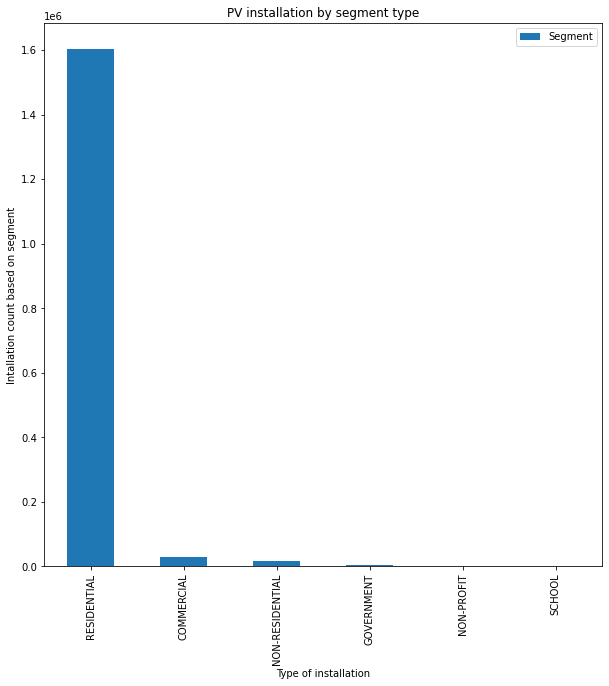

In [117]:


segment_type_dist.plot.bar(figsize = (10,10), title = 'PV installation by segment type', 
                           xlabel = 'Type of installation',ylabel = 'Intallation count based on segment')

As we can see a huge number of data points are for residential installations.Likewise we can make note of installations by state.

In [118]:
installation_state = pv2['state']
installation_state.unique()

array(['AR', 'CA', 'AZ', 'CO', 'CT', 'DC', 'DE', 'FL', 'IL', 'KS', 'MA',
       'MD', 'ME', 'MN', 'MO', 'NH', 'NM', 'NY', 'OH', 'OR', 'PA', 'RI',
       'TX', 'UT', 'VA', 'VT', 'WA', 'WI'], dtype=object)

In [119]:
state_dist = installation_state.value_counts()
state_dist.head()

CA    1038301
AZ     160099
NY      99642
MA      96837
CO      54734
Name: state, dtype: int64

In [120]:
state_count = list(installation_state.value_counts())
installation_state_dist = pd.DataFrame({'Installation State':state_count}, index = state_dist.index)
installation_state_dist.head()

,Installation State
CA,1038301
AZ,160099
NY,99642
MA,96837
CO,54734


<AxesSubplot:title={'center':'PV installation by state'}, xlabel='State of installation', ylabel='Intallation count based on state'>

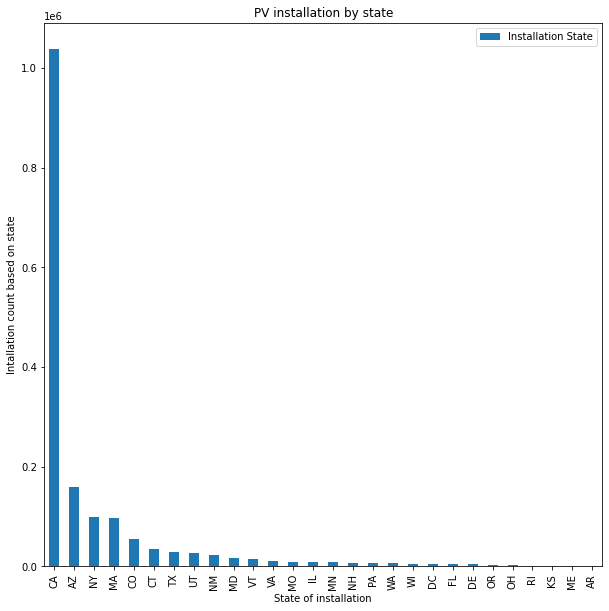

In [121]:
installation_state_dist.plot.bar(figsize = (10,10), title = 'PV installation by state', 
                           xlabel = 'State of installation',ylabel = 'Intallation count based on state')

As we see over 50% of the installations are in the state of California. This is interesting. One aspect that can be looked into is what makes California so popular for installations. Additionally, what percentage of California installations are residential? Is it climactic or economic? If economics is a significant factor, what can be done differently in other states with lower adoption to increase the count? These are some of the questions that can be looked into at a later stage. 

Another focus is: distribution of instllations by year. What was the oldest installation date? This can give an insight on as to whether PV adoption has increased, lowered or remained fairly the same over the years. 

However, it looks like the data has been adapted in a format that can be used for futher data analysis. 

# Summary

To summarize :
 - We started off by importing both datasets originally as csv files and all the relevant python packages. 
 
 - Subsequently we start the data wrangling process. A lot of the columns have mixed data types. Focusing on those columns we see that they are of the data type object and hence we convert all the values in those columns to strings to make our anaysis easy. 
 
 - Concat the the two data frames corresponding to the the two data sets. 
 
 - Moving on, we get rid of all the values that are invlaid. In this data set all invalid values are represented by -9999. So we first change them all to NaN since pandas has a more useful tools to deal with NaN than -9999. 
 
 - Now that we have converted all invalid values to NaN we analyse the % of missing values in each column. This gives us an insight into which columns to keep and which we can discard right away. 

 - Completing this analysis shows us that systems with 3 PV installations seem to have more than 90% values missing and invalid. Hence we decided to focus on systems only with up to 2 systems. 

 - In order to accurately consider systems with only 2 installations we first locate rows that have valid values for systems with 3 PV installations and remove them from the data set. That way when we perform further analysis on 2 PV installation systems, rows with 3 PV installation systems do not affect our process. 
 
 - After removing those rows we remove the columns pertaining to 3 PV installations. 
 
 - Finally we now have a data set that we can work with for the next stage - EDA. 
 
